In [1]:
import h5py
import matplotlib.pyplot as plt
import os

from plot_utils import *

%matplotlib inline

In [2]:
colors = ['#377eb8', '#ff7f00', '#4daf4a', 
          '#f781bf', '#a65628', '#984ea3', 
          '#999999', '#e41a1c', '#dede00',
          '#006BA4', '#FF800E', '#ABABAB', 
          '#595959', '#5F9ED1', '#C85200',
          '#898989', '#A2C8EC', '#FFBC79', 
          '#CFCFCF']

In [3]:
base_N = 'mi_results/exp2'
base_sigmaP = 'mi_results/exp3'
base_sigmaC = 'mi_results/exp4'

In [4]:
# first panel
Ns = np.array([8, 10, 12, 14])
results_N = []
for idx, N in enumerate(Ns):
    results_N.append(
        h5py.File(os.path.join(base_N, 'mi_N%s_sigmaM0.5_sigmaC0.5_sigmaS1.0.h5' %N), 'r')['results']
    ) 

# second panel
sigmaPs = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
results_sigmaP = []
for idx, sigmaP in enumerate(sigmaPs):
    results_sigmaP.append(
        h5py.File(os.path.join(base_sigmaP, 'mi_N12_sigmaM%0.1f_sigmaC0.5_sigmaS1.0.h5' %sigmaP), 'r')['results']
    )

# third panel
sigmaCs = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
results_sigmaC = []
for idx, sigmaC in enumerate(sigmaCs):
    results_sigmaC.append(
        h5py.File(os.path.join(base_sigmaC, 'mi_N12_sigmaM0.5_sigmaC%0.1f_sigmaS1.0.h5' %sigmaC), 'r')['results']
    )

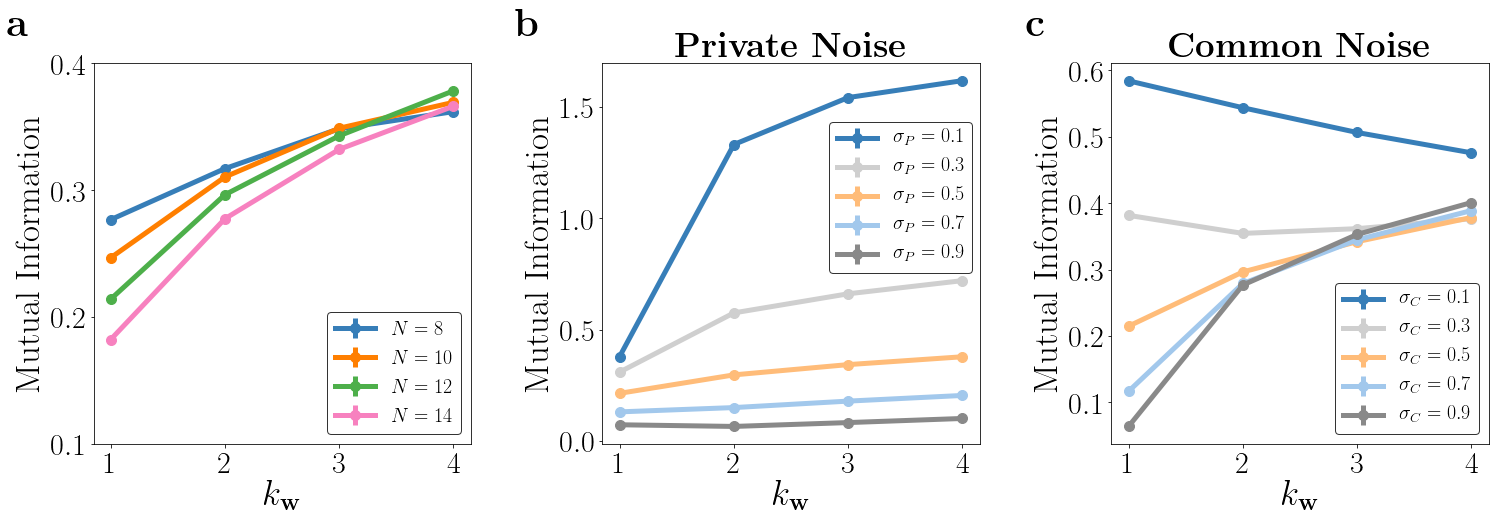

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))

# Figure 7a 

# iterate over population sizes
for idx, N in enumerate(Ns):
    axes[0].errorbar(
        [1, 2, 3, 4], 
        np.mean(results_N[idx][:, :], axis=1), 
        yerr=np.std(results_N[idx][:, :], axis=1)/10., 
        color=colors[idx], 
        linewidth=5,
        marker='o',
        markersize=10,
        label=r'$N=%s$' %N)
    lgd = axes[0].legend(prop={'size': 20})
    lgd.get_frame().set_edgecolor('black')

axes[0].tick_params(labelsize=30)
axes[0].set_xticks([1, 2, 3, 4])
axes[0].set_yticks([0.1, 0.2, 0.3, 0.4])
axes[0].set_xlabel(r'$k_{\mathbf{w}}$', fontsize=35)
axes[0].set_ylabel(r'Mutual Information', fontsize=35)

# Figure 7b

# iterate over private variances
for idx, sigmaP in enumerate(sigmaPs):
    axes[1].errorbar(
        [1, 2, 3, 4], 
        np.mean(results_sigmaP[idx][:, :], axis=1), 
        yerr=np.std(results_sigmaP[idx][:, :], axis=1)/10., 
        color=colors[-idx], 
        linewidth=5,
        marker='o',
        markersize=10,
        label=r'$\sigma_P=%s$' %sigmaP
    )
    lgd = axes[1].legend(loc=(0.6, 0.45), prop={'size': 20})
    lgd.get_frame().set_edgecolor('black')

axes[1].tick_params(labelsize=30)
axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xlabel(r'$k_{\mathbf{w}}$', fontsize=35)
axes[1].set_ylabel(r'Mutual Information', fontsize=35)
axes[1].set_title(r'\textbf{Private Noise}', fontsize=35)

# Figure 7c

# iterate over common variances
for idx, sigmaC in enumerate(sigmaCs):
    axes[2].errorbar(
        [1, 2, 3, 4], 
        np.mean(results_sigmaC[idx][:, :], axis=1), 
        yerr=np.std(results_sigmaC[idx][:, :], axis=1)/10., 
        color=colors[-idx], 
        linewidth=5,
        marker='o',
        markersize=10,
        label=r'$\sigma_C=%s$' %sigmaC)
    lgd = axes[2].legend(prop={'size': 20})
    lgd.get_frame().set_edgecolor('black')

axes[2].tick_params(labelsize=30)
axes[2].set_xticks([1, 2, 3, 4])
axes[2].set_xlabel(r'$k_{\mathbf{w}}$', fontsize=35)
axes[2].set_ylabel(r'Mutual Information', fontsize=35)
axes[2].set_title(r'\textbf{Common Noise}', fontsize=35)


# subplot labels
axes[0].text(
    x=-0.2, y=1.1, s=r'\textbf{a}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0].transAxes)

axes[1].text(
    x=-0.2, y=1.1, s=r'\textbf{b}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1].transAxes)

axes[2].text(
    x=-0.2, y=1.1, s=r'\textbf{c}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[2].transAxes)


plt.subplots_adjust(wspace=0.35)

plt.savefig('figure7.pdf', bbox_inches='tight')